# Task I: Quantum Computing Part 

## 1. Implement a simple quantum operation with Cirq or Pennylane
<ol> 
    <li> With 5 qubits 
    <li> Apply Hadamard operation on every qubit 
    <li> Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
    <li> SWAP (0, 4) 
    <li> Rotate X with pi/2 on any qubit 
    <li> Plot the circuit 
</ol>
<hr>

## 2. Implement a second circuit with a framework of your choice:
<ol>
    <li> Apply a Hadmard gate to the first qubit
    <li> Rotate the second qubit by pi/3 around X
    <li> Apply Hadamard gate to the third and fourth qubit
    <li> Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>
</ol>
<hr>

# Task 1


0: ───H───

1: ───H───

2: ───H───

3: ───H───

4: ───H───
0: ───H───@───────────────
          │
1: ───H───X───@───────────
              │
2: ───H───────X───@───────
                  │
3: ───H───────────X───@───
                      │
4: ───H───────────────X───
0: ───H───@───────────────×───
          │               │
1: ───H───X───@───────────┼───
              │           │
2: ───H───────X───@───────┼───
                  │       │
3: ───H───────────X───@───┼───
                      │   │
4: ───H───────────────X───×───
0: ───H───@──────────────────────×───
          │                      │
1: ───H───X───@──────────────────┼───
              │                  │
2: ───H───────X───@───Rx(0.5π)───┼───
                  │              │
3: ───H───────────X───@──────────┼───
                      │          │
4: ───H───────────────X──────────×───
measurements: (no measurements)

qubits: (cirq.LineQubit(4), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(0))

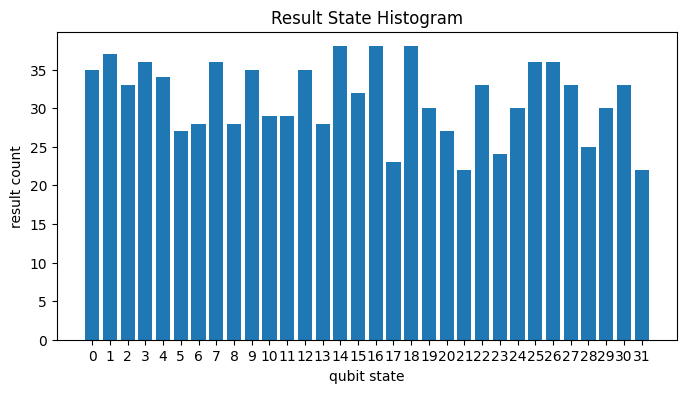

In [9]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

# Create 5 qubits
qubits = [cirq.LineQubit(i) for i in range(5)]

# Define the circuit
circuit_task01 = cirq.Circuit()
print (circuit_task01)

# Apply Hadamard gate to each qubit
circuit_task01.append(cirq.H(q) for q in qubits)
print (circuit_task01)

# Apply CNOT gates
circuit_task01.append(cirq.CNOT(qubits[i], qubits[i + 1]) for i in range(4))
print (circuit_task01)

# Apply SWAP between qubit 0 and 4
circuit_task01.append(cirq.SWAP(qubits[0], qubits[4]))
print (circuit_task01)

# Apply Rx(pi/2) to qubit 2 (arbitrarily chosen)
circuit_task01.append(cirq.rx(np.pi / 2)(qubits[2]))
print (circuit_task01)

s = cirq.Simulator()
results = s.simulate(circuit_task01)
print (results)
circuit_task01.append(cirq.measure(cirq.LineQubit(4), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(0), key='result'))
samples = s.run(circuit_task01, repetitions=1000)

# Plot the circuit
cirq.CircuitDiagramInfo(circuit_task01)
fig, ax = plt.subplots(figsize=(8, 4))
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()
